In [146]:
import pandas as pd 

file_path = "C:/Users/aweso/OneDrive - Clark University/Year 3 Semester 2/DSCI 225 - Applied Machine Learning/Homework/Homework 2/cumulative.csv"
data = pd.read_csv(file_path)

data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [147]:
data.shape

(9564, 50)

In [148]:
columns = data.columns

In [149]:
#Dropping koi_pdisposition and koi_score since they aren't not necessary for our classification model
data = data.drop(['koi_pdisposition', 'koi_score'], axis = 1)

data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,0,0,0,0,9.488036,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,0,0,0,0,54.418383,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0,1,0,0,19.899140,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0,1,0,0,1.736952,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,0,0,0,0,2.525592,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [150]:
#This is to gather all the uncertainty columns from the dataset. Because all of the uncertainty columns contain 'err' in them,
#I can use the search function and filter the ones that do and add them to a list. This list will be put into the drop function to drop the columns.

import re

err_columns = []
for i in columns:
  if re.search('err', i):
    err_columns.append(i)

In [151]:
#Dropping uncertainties since we wont be using these.
data = data.drop(err_columns, axis = 1)

data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,0,0,0,0,9.488036,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,0,0,0,0,54.418383,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0,1,0,0,19.899140,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0,1,0,0,1.736952,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,0,0,0,0,2.525592,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [152]:
#Going to remove all na values
data.isna().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_time0bk             0
koi_impact            363
koi_duration            0
koi_depth             363
koi_prad              363
koi_teq               363
koi_insol             321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_slogg             363
koi_srad              363
ra                      0
dec                     0
koi_kepmag              1
dtype: int64

In [153]:
#Dropping all na rows besides the kepler name because there are many of those that are na and it also is due to not all of them being confirmed

data.dropna(subset=['rowid', 'kepid', 'kepoi_name', 'koi_disposition',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
       'koi_kepmag'], inplace=True, axis=0)

In [154]:
data = data.drop(['rowid', 'kepid'], axis = 1)

In [170]:
y = data['koi_disposition'] == 'CONFIRMED'
data['koi_disposition'] = y

In [155]:
data.dtypes

kepoi_name            object
kepler_name           object
koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_time0bk          float64
koi_impact           float64
koi_duration         float64
koi_depth            float64
koi_prad             float64
koi_teq              float64
koi_insol            float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_tce_delivname     object
koi_steff            float64
koi_slogg            float64
koi_srad             float64
ra                   float64
dec                  float64
koi_kepmag           float64
dtype: object

In [156]:
data = data.drop(['kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname'], axis = 1)

In [157]:
data.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


| Variable Name      | Definition                                                                 |
|--------------------|----------------------------------------------------------------------------|
| koi_disposition    | Disposition of the Kepler Object of Interest (KOI)                         |
| koi_fpflag_nt      | KOI false positive flag - not transit-like                                 |
| koi_fpflag_ss      | KOI false positive flag - stellar eclipse                                  |
| koi_fpflag_co      | KOI false positive flag - centroid offset                                  |
| koi_fpflag_ec      | KOI false positive flag - ephemeris match indicates contamination          |
| koi_period         | Orbital period of the planet candidate                                     |
| koi_time0bk        | Transit epoch in Barycentric Julian Date (BJD)                             |
| koi_impact         | Impact parameter                                                           |
| koi_duration       | Duration of the transit                                                    |
| koi_depth          | Depth of the transit                                                       |
| koi_prad           | Radius of the planet candidate                                             |
| koi_teq            | Equilibrium temperature of the planet candidate                            |
| koi_insol          | Insolation flux received by the planet candidate                           |
| koi_model_snr      | Signal-to-noise ratio of the transit model                                 |
| koi_steff          | Effective temperature of the host star                                     |
| koi_slogg          | Surface gravity of the host star                                           |
| koi_srad           | Radius of the host star                                                    |
| ra                 | Right ascension of the host star                                           |
| dec                | Declination of the host star                                               |
| koi_kepmag         | Kepler magnitude of the host star                                          |

In [158]:
data['koi_disposition'].value_counts()

koi_disposition
FALSE POSITIVE    4524
CONFIRMED         2285
CANDIDATE         2136
Name: count, dtype: int64

In [159]:
data.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8.945000e+03,8945.000000,8945.000000,8.945000e+03,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000
mean,0.160313,0.244047,0.204360,0.126775,55.678924,164.278021,0.731219,5.539390,2.440240e+04,103.836524,1095.128228,7.636370e+03,265.700704,5700.092342,4.309781,1.734644,292.089269,43.809421,14.280905
std,0.366917,0.429545,0.403256,0.332739,116.963448,66.255034,3.233865,6.413855,8.330044e+04,3117.326455,851.928698,1.601557e+05,804.188708,797.056303,0.434144,6.192780,4.773284,3.601858,1.373123
min,0.000000,0.000000,0.000000,0.000000,0.259820,120.515914,0.000000,0.052000,0.000000e+00,0.080000,92.000000,2.000000e-02,0.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.621707,132.701600,0.198500,2.437000,1.608000e+02,1.400000,553.000000,2.217000e+01,12.300000,5300.000000,4.218000,0.828000,288.697420,40.776970,13.462000
50%,0.000000,0.000000,0.000000,0.000000,8.827158,136.823360,0.545000,3.778000,4.245000e+02,2.410000,888.000000,1.469500e+02,23.700000,5763.000000,4.438000,1.000000,292.292390,43.671661,14.531000
75%,0.000000,0.000000,0.000000,0.000000,33.788803,169.833943,0.892000,6.158000,1.517500e+03,15.640000,1392.000000,8.867200e+02,80.200000,6108.000000,4.543000,1.345000,295.907440,46.703129,15.324000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


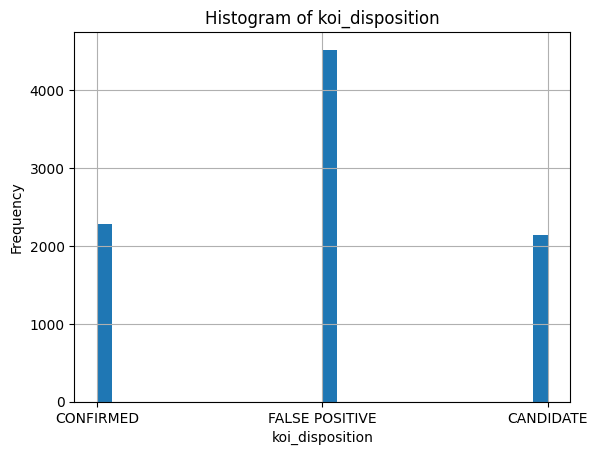

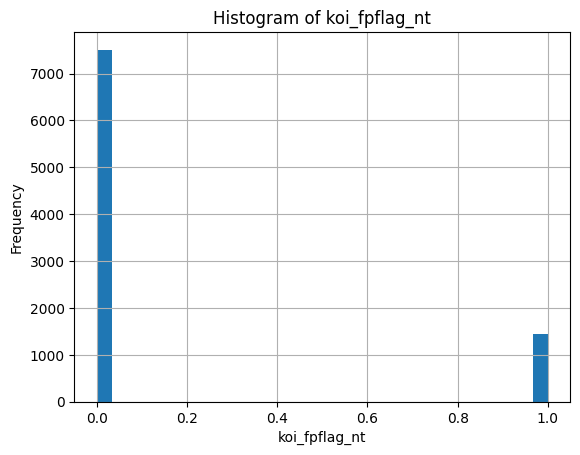

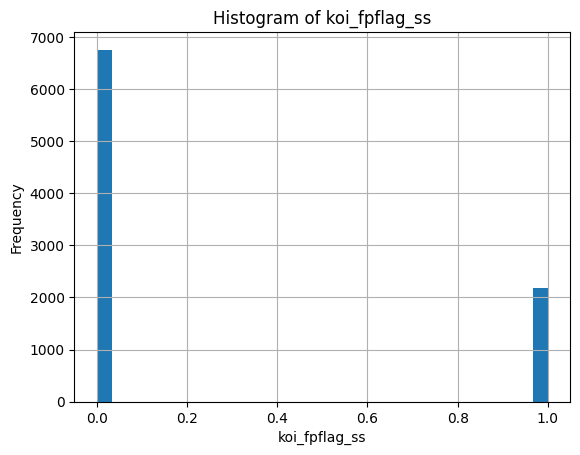

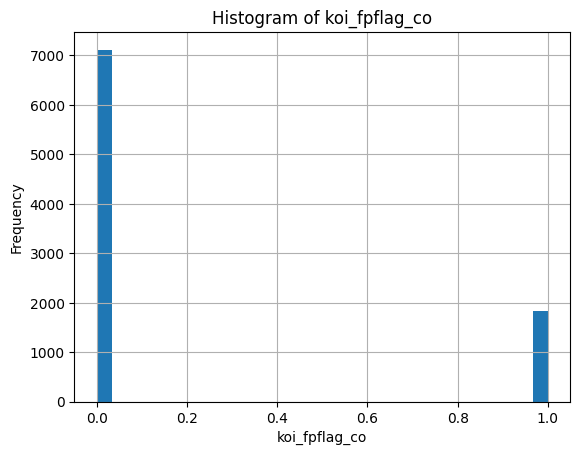

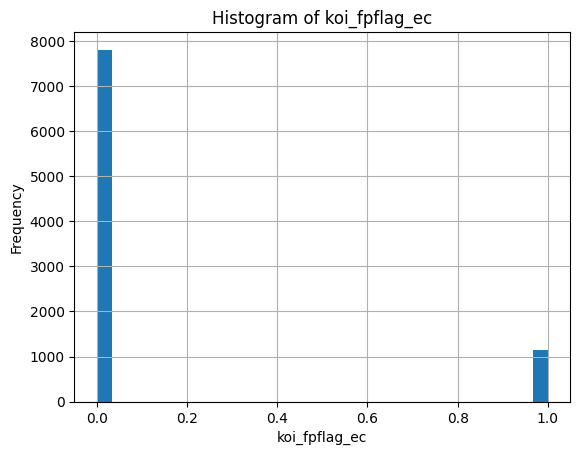

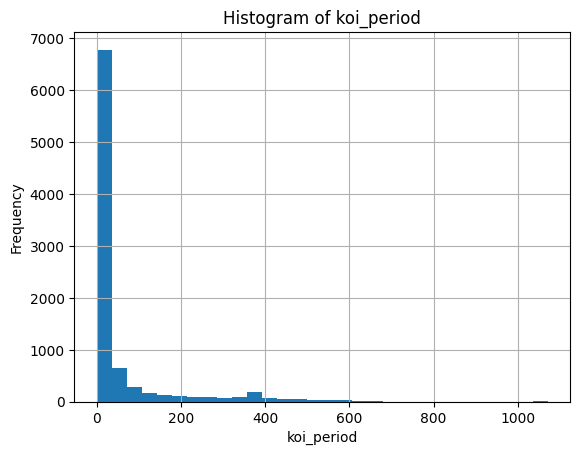

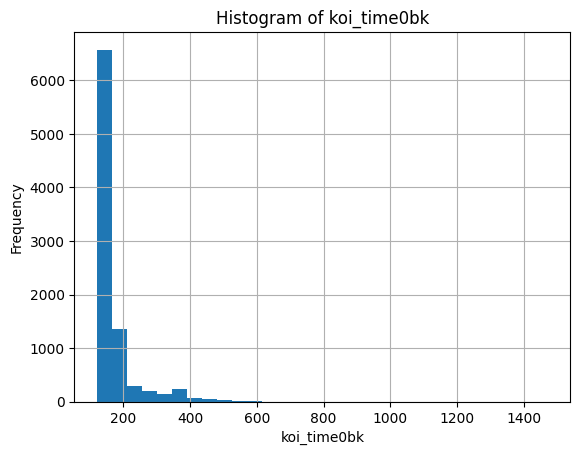

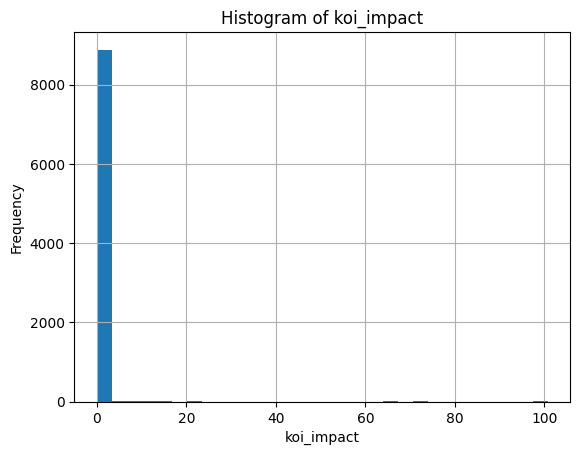

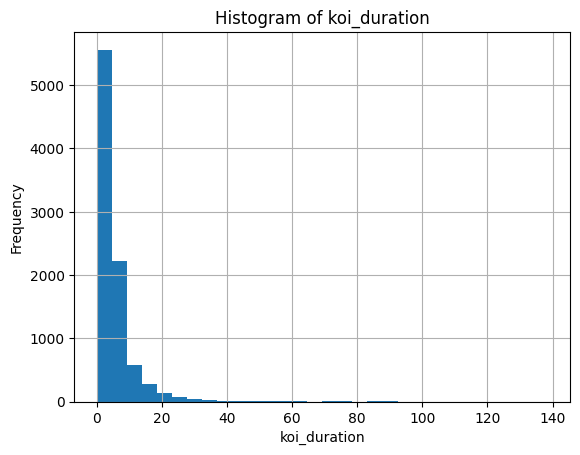

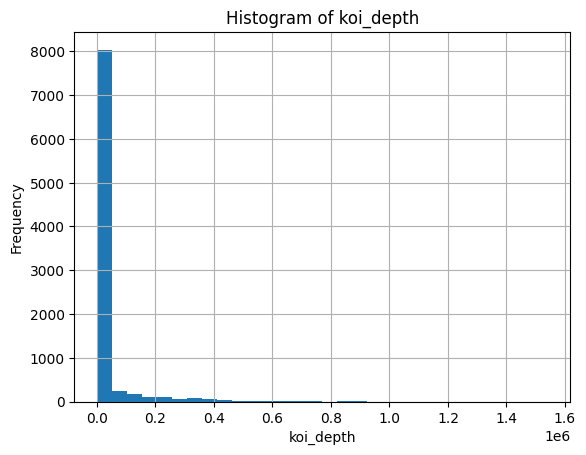

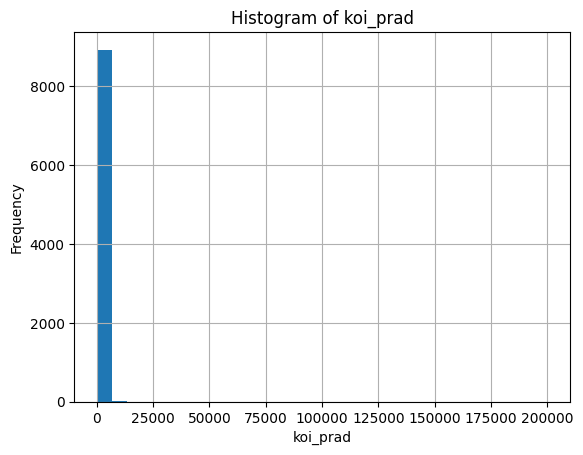

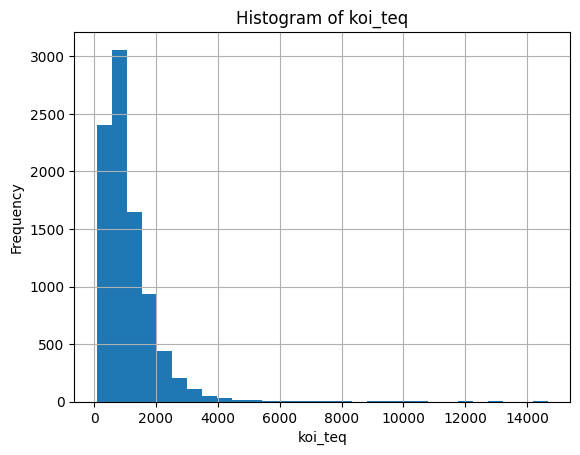

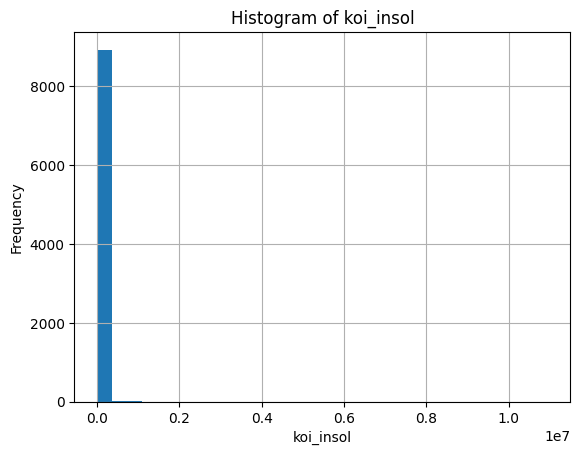

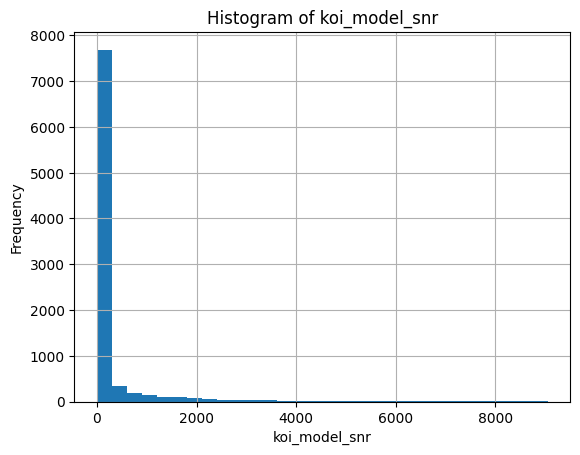

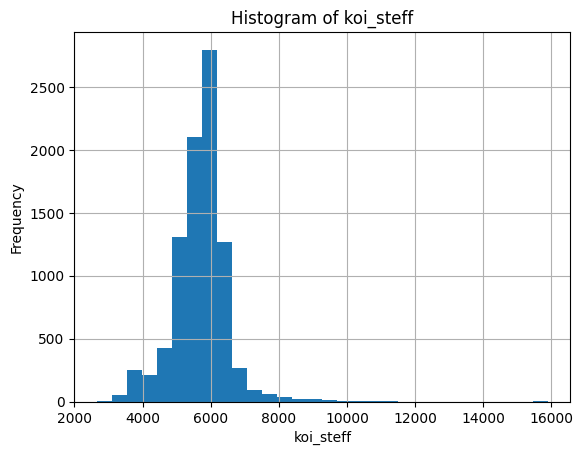

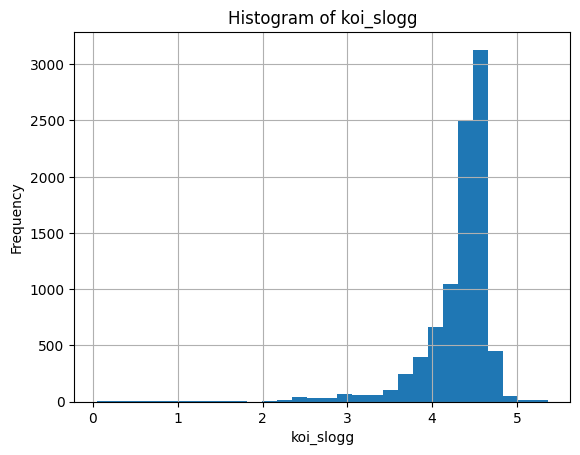

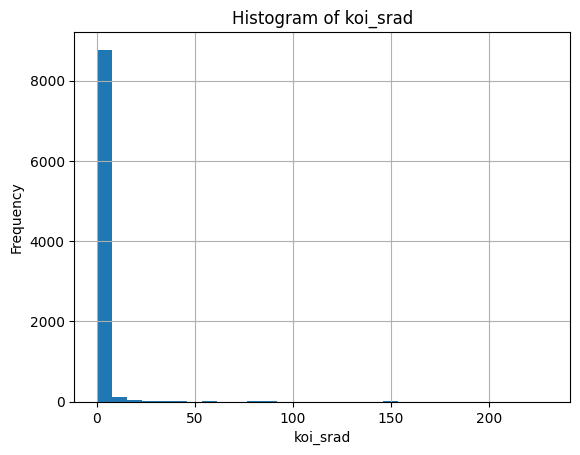

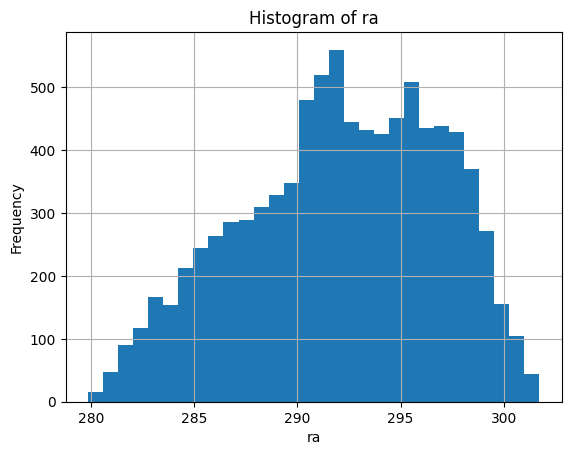

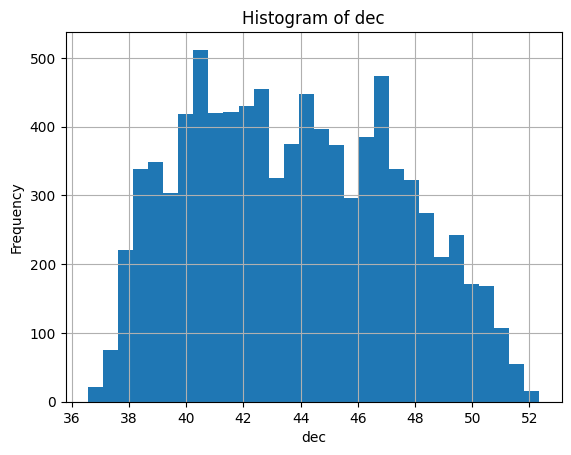

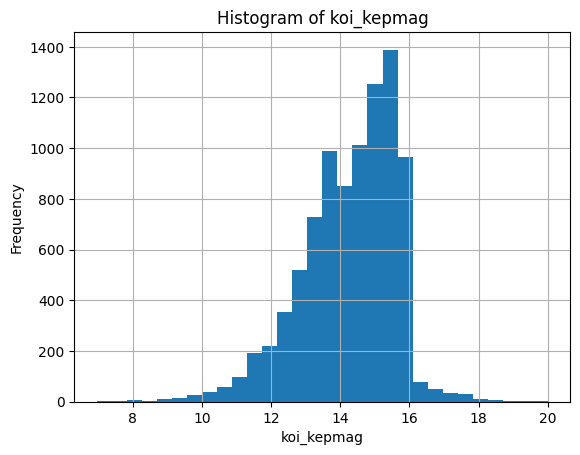

In [17]:
import matplotlib.pyplot as plt

for column in data.columns:
  plt.figure()  # Create a new figure for each histogram
  data[column].hist(bins=30)  # Adjust the number of bins as needed
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


In [160]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['koi_depth', 'koi_prad', 'koi_time0bk']] = scaler.fit_transform(data[['koi_depth', 'koi_prad', 'koi_time0bk']])


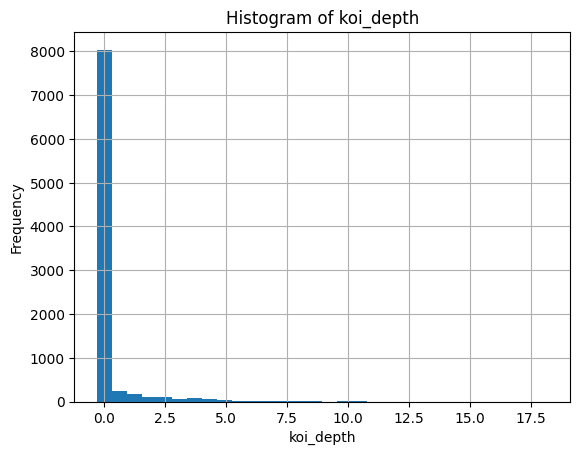

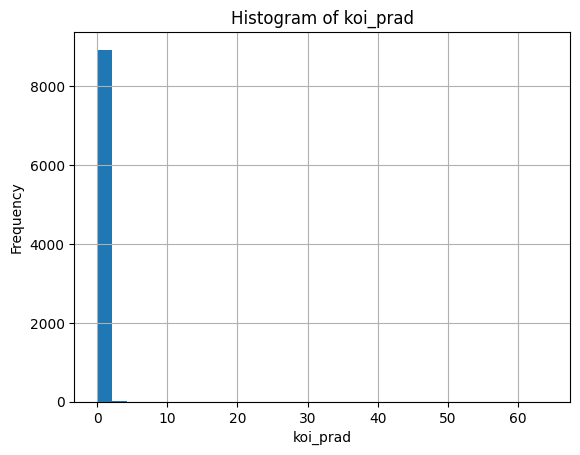

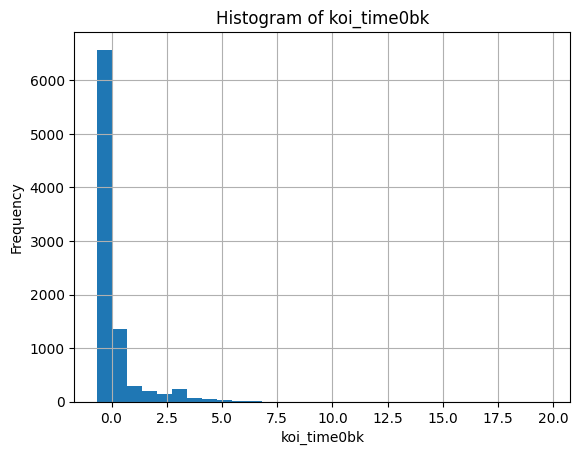

In [19]:
for column in ['koi_depth', 'koi_prad', 'koi_time0bk']:
  plt.figure()  # Create a new figure for each histogram
  data[column].hist(bins=30)  # Adjust the number of bins as needed
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

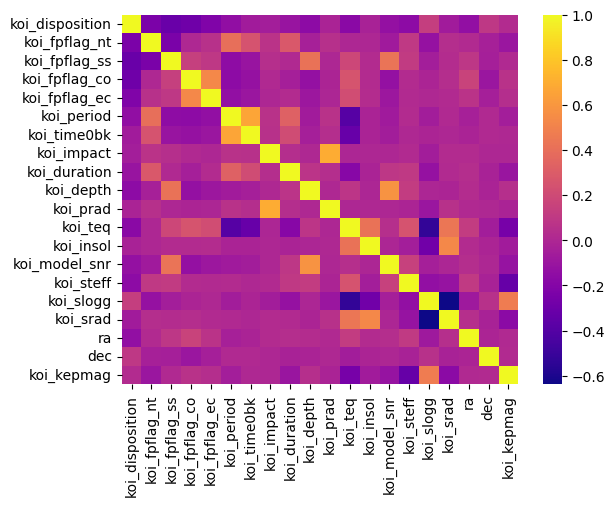

In [21]:
import seaborn as sns
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, cmap='plasma')
plt.show()

In [22]:
correlation_matrix[abs(correlation_matrix) > .5]

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
koi_disposition,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_fpflag_nt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_fpflag_ss,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_fpflag_co,NaN,NaN,NaN,1.000000,0.529337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_fpflag_ec,NaN,NaN,NaN,0.529337,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_period,NaN,NaN,NaN,NaN,NaN,1.000000,0.663649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_time0bk,NaN,NaN,NaN,NaN,NaN,0.663649,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.696043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.578908,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Taking all the pairs that have a correlation absolute value of .5 or greater and multiplying them to create a combined variable

#var 1 - koi_fpflag_ec * koi_fpflag_co = fpflag_ec_co
data['fpflag_ec_co'] = data["koi_fpflag_ec"] * data['koi_fpflag_co']

#var 2 - koi_time0bk * koi_period = time_per
data['time_per'] = data['koi_time0bk'] * data['koi_period']

#var 3 - koi_prad * koi_impact = prad_imp
data['prad_imp'] = data['koi_prad'] * data['koi_impact']

#var 4 - koi_model_snr * koi_depth = model_dep
data['model_dep'] = data['koi_model_snr'] * data['koi_depth']

#var 5 - koi_slogg * koi_teq = slog_teq
data['slog_teq'] = data['koi_slogg'] * data['koi_teq']

#var 6 - koi_srad * koi_insol = srad_in
data['srad_in'] = data['koi_srad'] * data['koi_insol']

In [24]:
#Now that we have the new columns, we can create a new dataset without any of those jointly dependant pairs
new_data = data.drop(['koi_fpflag_co', "koi_fpflag_ec", 'koi_period', 'koi_time0bk','koi_impact' , 'koi_prad', 'koi_model_snr', 'koi_depth', 'koi_slogg', 'koi_teq', 'koi_srad', 'koi_insol'], axis = 1)

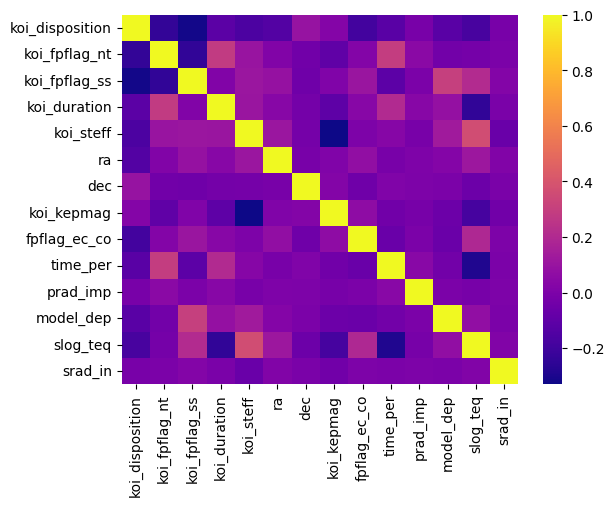

In [25]:
#creating another heatmap to show there are less significant dependencies with our independent variables
correlation_matrix = new_data.corr()

sns.heatmap(correlation_matrix, cmap='plasma')
plt.show()

In [26]:
#We need to see if the multiplication for those new columns created a huge scale, meaning we might need to rescale some variables
new_data.describe()

#From the describe table, we see that koi_steff, time_per has some outliers/large spread and its large scale could impact the classification

,koi_fpflag_nt,koi_fpflag_ss,koi_duration,koi_steff,ra,dec,koi_kepmag,fpflag_ec_co,time_per,prad_imp,model_dep,slog_teq,srad_in
count,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,8.945000e+03
mean,0.160313,0.244047,5.539390,5700.092342,292.089269,43.809421,14.280905,0.096926,77.618310,2.250784,465.525386,4524.440167,5.364590e+05
std,0.366917,0.429545,6.413855,797.056303,4.773284,3.601858,1.373123,0.295873,314.003837,93.992747,2410.896008,2859.711689,2.086428e+07
min,0.000000,0.000000,0.052000,2661.000000,279.852720,36.577381,6.966000,0.000000,-324.365522,-0.040665,-1265.455941,303.240000,6.360000e-03
25%,0.000000,0.000000,2.437000,5300.000000,288.697420,40.776970,13.462000,0.000000,-3.931600,-0.024154,-10.604370,2409.732000,2.108000e+01
50%,0.000000,0.000000,3.778000,5763.000000,292.292390,43.671661,14.531000,0.000000,-1.161218,-0.013600,-4.766142,3829.933000,1.604077e+02
75%,0.000000,0.000000,6.158000,6108.000000,295.907440,46.703129,15.324000,0.000000,0.372548,-0.004219,-2.677137,5938.908000,1.053577e+03
max,1.000000,1.000000,138.540000,15896.000000,301.720760,52.336010,20.003000,1.000000,4139.459413,6436.472307,51451.181583,26145.144000,1.511376e+09


In [27]:
new_data[new_data['koi_steff'] == 15896]

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_duration,koi_steff,ra,dec,koi_kepmag,fpflag_ec_co,time_per,prad_imp,model_dep,slog_teq,srad_in
9492,False,0,1,10.716,15896.0,291.42249,38.535229,15.799,0,-0.52898,-0.021797,-112.169394,26145.144,893984.75944


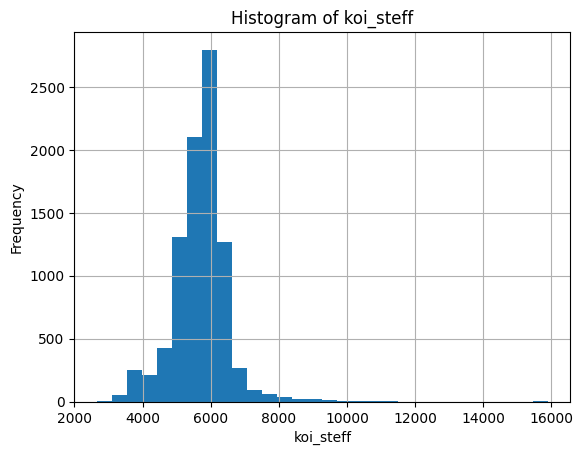

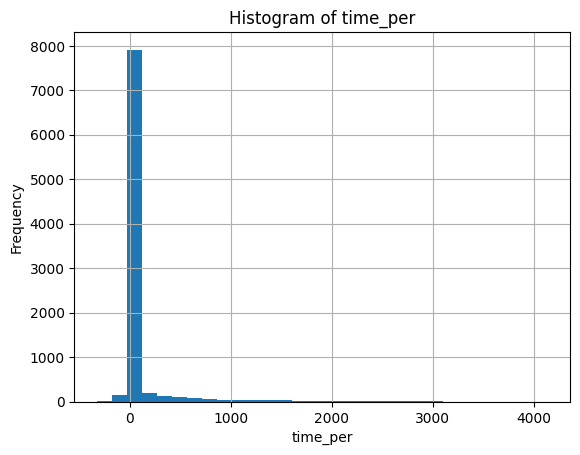

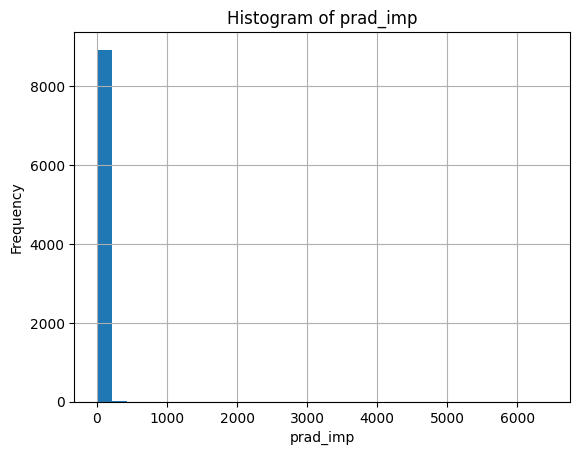

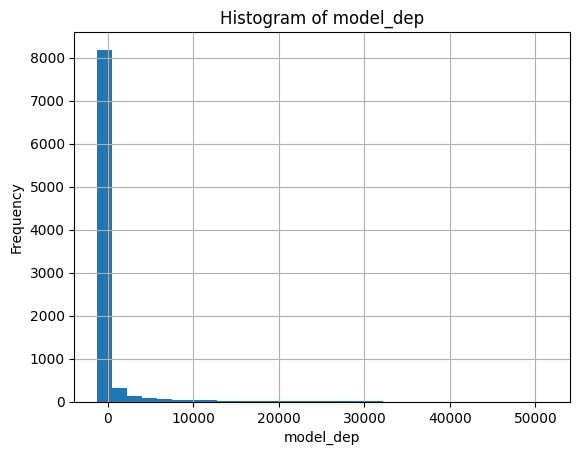

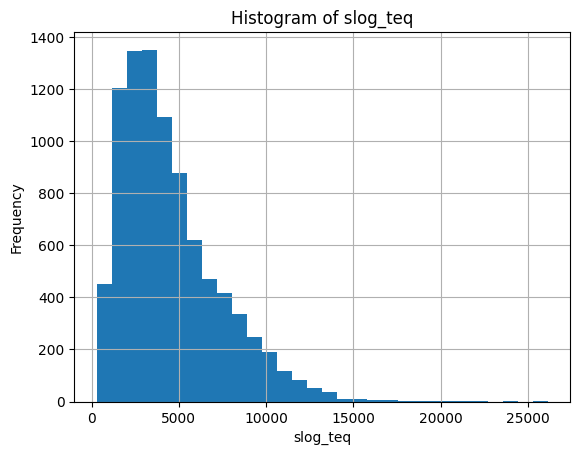

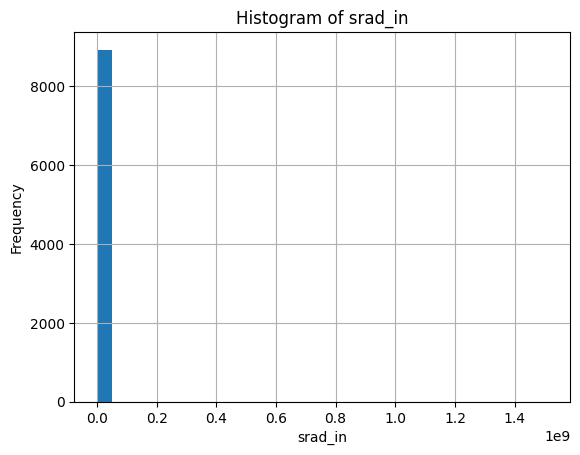

In [28]:
#plotting potential columns to scale

for column in ['koi_steff', 'time_per', 'prad_imp', 'model_dep', 'slog_teq', 'srad_in']:
  plt.figure()  # Create a new figure for each histogram
  new_data[column].hist(bins=30)  # Adjust the number of bins as needed
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [29]:
#Based off the histograms, preform min_max scaling on srad_in and standard_scale on model_dep, time_per, 

In [30]:
new_data

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_duration,koi_steff,ra,dec,koi_kepmag,fpflag_ec_co,time_per,prad_imp,model_dep,slog_teq,srad_in
0,True,0,0,2.95750,5455.0,291.93423,48.141651,15.347,0,0.896616,-0.004758,-10.223331,3542.331,86.75793
1,True,0,0,4.50700,5455.0,291.93423,48.141651,15.347,0,-1.449086,-0.018988,-7.287429,1978.881,8.44497
2,False,0,1,1.78220,5853.0,297.00482,48.134129,15.436,0,3.475816,-0.027740,-12.433410,2899.072,34.11240
3,False,0,1,2.40641,5805.0,285.53461,48.285210,15.597,0,0.158080,-0.028808,-99.080778,6366.780,705.54036
4,True,0,0,1.65450,6031.0,288.75488,48.226200,15.509,0,0.278954,-0.022733,-11.685865,6239.828,968.76336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,False,0,0,4.80600,5638.0,298.74921,46.973351,14.478,0,-4.182946,-0.025211,-2.452027,3990.984,191.92320
9560,False,0,1,3.22210,5638.0,297.18875,47.093819,14.082,0,-0.259447,-0.029917,-124.205056,9456.552,4063.97859
9561,False,0,0,3.11400,6119.0,286.50937,47.163219,14.757,0,-0.821370,-0.001422,-3.099213,7145.952,1634.97011
9562,False,0,0,0.86500,6173.0,294.16489,47.176281,15.385,0,-0.330113,-0.004846,-3.588120,9863.446,5947.65981


In [197]:
from sklearn.model_selection import train_test_split

X = data.drop('koi_disposition', axis = 1)
y = data['koi_disposition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, class_weight='balanced')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(class_weight='balanced', random_state=42)

In [173]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [71]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import make_scorer, f1_score

# # Define parameter grid
# param_grid = [
#     {'loss': ['hinge', 'log', 'modified_huber'],  # Different loss functions for SGD
#      'alpha': [0.0001, 0.001, 0.01],            # Regularization strength
#      'penalty': ['l2', 'l1', 'elasticnet']}     # Regularization types
# ]

# # Create SGDClassifier instance
# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, class_weight='balanced')

# # Use GridSearchCV to search for the best hyperparameters
# grid_search = GridSearchCV(
#     sgd_clf,
#     param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='precision',  # Use F1 score for binary classification
#     return_train_score=True
# )

# # Train GridSearchCV on your training data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best hyperparameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation precision score:", grid_search.best_score_)

Best parameters: {'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l1'}
Best cross-validation precision score: 0.5338573186219728


c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File

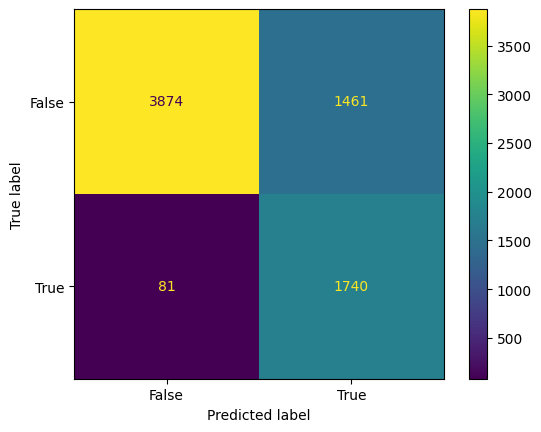

In [199]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mx ,display_labels = [False, True])

cm_display.plot()
plt.show()

In [200]:
from sklearn.metrics import precision_score, recall_score


print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.5435801312089972
0.9555189456342669


In [201]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.6929510155316607

In [203]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [219]:
from sklearn.linear_model import SGDClassifier

# Use 'log' loss for probabilistic output
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42, class_weight='balanced')

# Fit the model
sgd_clf.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_proba = sgd_clf.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Adjust decision threshold
threshold = 0.709
y_pred_strict = (y_pred_proba >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_strict))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_strict))

Confusion Matrix:
[[1052  273]
 [  51  413]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.79      0.87      1325
        True       0.60      0.89      0.72       464

    accuracy                           0.82      1789
   macro avg       0.78      0.84      0.79      1789
weighted avg       0.86      0.82      0.83      1789



In [214]:
from sklearn.metrics import precision_recall_curve

probabilities = sgd_clf.predict_proba(X_test_scaled)[:, 1]
precision , recall, thresholds = precision_recall_curve(y_test, probabilities)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)
best_f1 = np.max(f1_scores)
best_thresh = thresholds[np.argmax(f1_scores)]

In [215]:
best_thresh

0.7093092759149686

Best parameters: {'alpha': 0.0001, 'class_weight': {0: 2, 1: 1}, 'loss': 'hinge', 'penalty': 'l2'}
Best cross-validation F1 score: 0.10605104412841755
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.98      0.85      1325
        True       0.50      0.05      0.10       464

    accuracy                           0.74      1789
   macro avg       0.62      0.52      0.47      1789
weighted avg       0.68      0.74      0.65      1789



c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

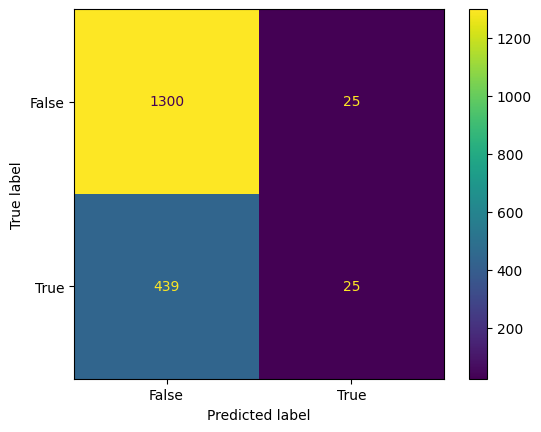

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Define parameter grid with custom class weights
param_grid = {
    'loss': ['log', 'hinge'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'elasticnet'],
    'class_weight': [{0: 1, 1: 1.5}, {0: 1, 1: 2}, {0: 1, 1: 3}]
}

# Create SGDClassifier instance
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    sgd_clf,
    param_grid,
    cv=5,
    scoring='f1',  # F1 score balances precision and recall
    return_train_score=True
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and estimator
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1 score:", grid_search.best_score_)



# Evaluate on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [130]:
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_pred_proba >= 0.6).astype(int)  # Adjust threshold

AttributeError: This 'SGDClassifier' has no attribute 'predict_proba'

In [ ]:
# Predict probabilities
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Adjust decision threshold
threshold = 0.6
y_pred_strict = (y_pred_proba >= threshold).astype(int)

# Evaluate the stricter predictions
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_strict))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_strict))

AttributeError: This 'SGDClassifier' has no attribute 'predict_proba'